In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-dataset/advertising.csv


**Import Necessary Libraries**

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Loading The Dataset**

In [3]:
df = pd.read_csv("/kaggle/input/advertising-dataset/advertising.csv",encoding='latin')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

**Understand The Dataset**

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
## Checking Null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df = df[["TV","Sales"]]
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


In [8]:
df.shape

(200, 2)

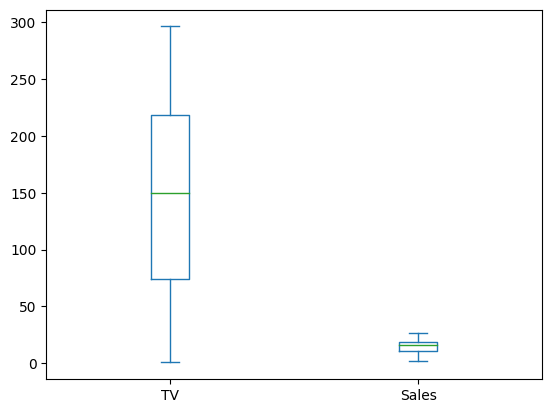

In [9]:
# to check the Outlier
df.plot(kind="box")
plt.show()

**To Find The Correlation Coefficient**

In [10]:
df.corr()

,TV,Sales
TV,1.000000,0.901208
Sales,0.901208,1.000000


In [11]:
x = df["TV"]
y = df["Sales"]

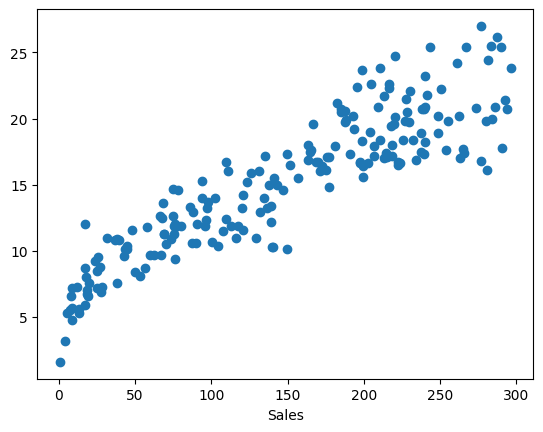

In [12]:
plt.scatter(x,y)
plt.xlabel("TV")
plt.xlabel("Sales")
plt.show()

**Splitting The Dataset Into Train data and Test data**

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state=20)
x_train

152    197.6
67     139.3
133    219.8
59     210.7
63     102.7
       ...  
148     38.0
137    273.7
156     93.9
15     195.4
99     135.2
Name: TV, Length: 160, dtype: float64

**Changing The Input Data Into Two Dimensional Array**

In [14]:
x_train = np.array(x_train).reshape(-1,1)
x_train

array([[197.6],
       [139.3],
       [219.8],
       [210.7],
       [102.7],
       [253.8],
       [222.4],
       [224. ],
       [241.7],
       [  0.7],
       [ 23.8],
       [ 59.6],
       [100.4],
       [171.3],
       [ 88.3],
       [ 44.5],
       [198.9],
       [ 76.4],
       [ 11.7],
       [131.1],
       [ 36.9],
       [239.3],
       [218.4],
       [237.4],
       [175.1],
       [220.3],
       [217.7],
       [ 75.5],
       [ 70.6],
       [134.3],
       [290.7],
       [ 90.4],
       [ 28.6],
       [238.2],
       [234.5],
       [237.4],
       [ 74.7],
       [289.7],
       [230.1],
       [177. ],
       [214.7],
       [ 48.3],
       [ 66.9],
       [292.9],
       [ 69. ],
       [283.6],
       [ 31.5],
       [187.9],
       [177. ],
       [165.6],
       [ 76.4],
       [136.2],
       [ 17.2],
       [216.8],
       [213.4],
       [199.8],
       [ 13.1],
       [117.2],
       [210.8],
       [222.4],
       [  7.3],
       [112.9],
       [

In [15]:
x_test = np.array(x_test).reshape(-1,1)
x_test

array([[280.7],
       [248.8],
       [ 97.5],
       [276.7],
       [255.4],
       [215.4],
       [170.2],
       [ 94.2],
       [239.9],
       [ 38.2],
       [ 25.6],
       [120.5],
       [191.1],
       [ 17.9],
       [213.5],
       [276.9],
       [  4.1],
       [206.8],
       [ 18.8],
       [ 17.2],
       [248.4],
       [209.6],
       [109.8],
       [243.2],
       [205. ],
       [104.6],
       [232.1],
       [  7.8],
       [  8.7],
       [184.9],
       [ 95.7],
       [184.9],
       [ 25.1],
       [ 26.8],
       [287.6],
       [193.2],
       [ 44.7],
       [ 89.7],
       [ 76.3],
       [175.7]])

**To Implement The Linear Regression**

In [16]:
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [17]:
#To find the intercept
c = lr.intercept_
c

7.079222818073074

In [18]:
#To find the coefficient
m=lr.coef_
m

array([0.05428243])

**To predict the Simple Linear Regression**

In [19]:
y_train_predict = lr.predict(x_train)
y_train_predict

array([17.80543104, 14.64076536, 19.010501  , 18.51653088, 12.65402841,
       20.85610363, 19.15163532, 19.2384872 , 20.19928622,  7.11722052,
        8.37114466, 10.31445566, 12.52917882, 16.37780313, 11.87236141,
        9.49479097, 17.8759982 , 11.22640049,  7.71432725, 14.19564943,
        9.0822445 , 20.06900839, 18.93450559, 19.96587177, 16.58407636,
       19.03764221, 18.89650789, 11.17754631, 10.9115624 , 14.36935321,
       22.85912531, 11.98635452,  8.63170032, 20.00929771, 19.80845272,
       19.96587177, 11.13412036, 22.80484288, 19.56961003, 16.68721298,
       18.7336606 ,  9.7010642 , 10.7107174 , 22.97854665, 10.82471051,
       22.47372005,  8.78911937, 17.27889147, 16.68721298, 16.06839328,
       11.22640049, 14.47248982,  8.01288062, 18.84765371, 18.66309344,
       17.92485239,  7.79032265, 13.44112365, 18.52195912, 19.15163532,
        7.47548456, 13.2077092 , 18.15826684, 14.74933022, 13.08828785,
       19.45561693,  8.43628358, 22.28915979, 13.64739688, 14.10

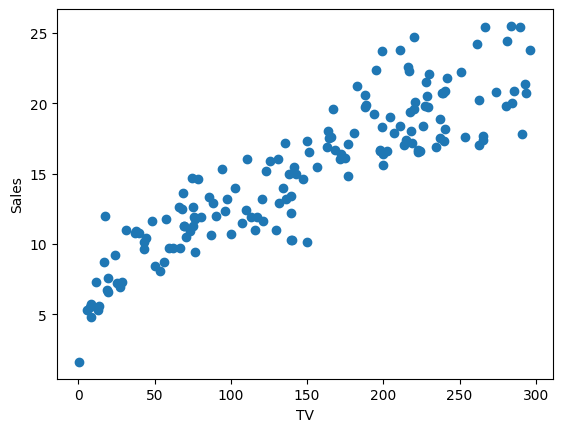

In [20]:
plt.scatter(x_train,y_train)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

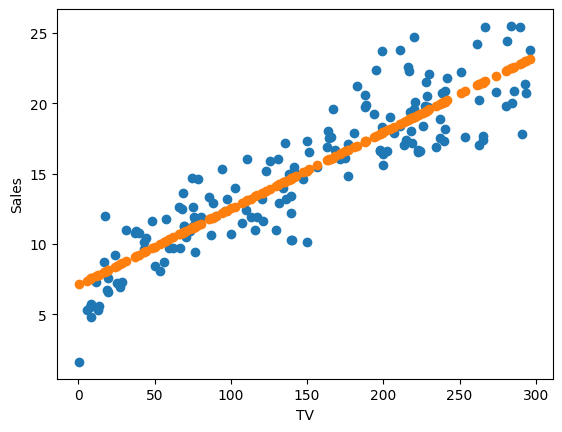

In [21]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,y_train_predict)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

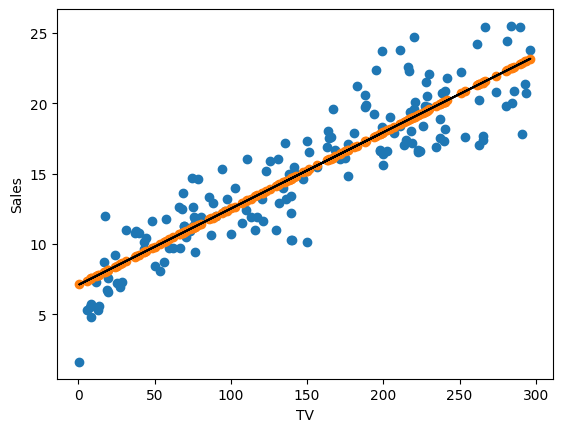

In [22]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,y_train_predict)
plt.plot(x_train,y_train_predict,color="black")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

**To Predict The Test data**

In [23]:
y_predict_test = lr.predict([[17.2]])
y_predict_test

array([8.01288062])

In [24]:
y_predict_test = lr.predict(x_test)
y_predict_test

array([22.316301  , 20.58469148, 12.37175977, 22.09917128, 20.94295552,
       18.7716583 , 16.31809245, 12.19262775, 20.10157785,  9.15281166,
        8.46885303, 13.62025567, 17.45259525,  8.05087832, 18.66852169,
       22.11002777,  7.30178078, 18.3048294 ,  8.09973251,  8.01288062,
       20.5629785 , 18.45682021, 13.03943366, 20.28070987, 18.20712103,
       12.75716503, 19.67817489,  7.50262577,  7.55147996, 17.11604418,
       12.2740514 , 17.11604418,  8.44171182,  8.53399195, 22.69084977,
       17.56658835,  9.50564745, 11.94835682, 11.22097225, 16.61664582])

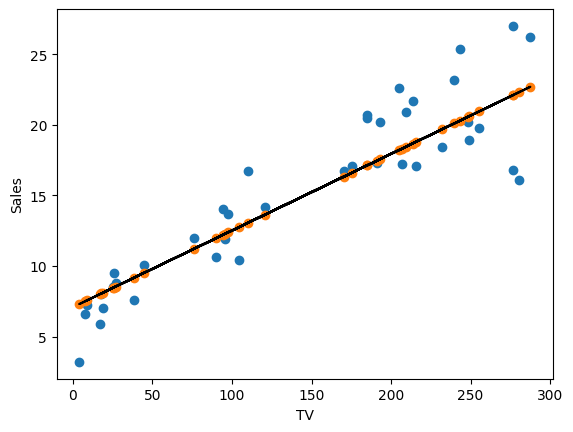

In [25]:
#Hence the fully trained model is repesenting predictive results in graph form
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_predict_test)
plt.plot(x_test,y_predict_test,color="black")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()